Лабораторна робота 3
Тема: Лінійна регресія


In [27]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
import pandas as pd

In [28]:
# Завдання 1. Завантажити Diabetes Dataset

data = load_diabetes()
X, y = data.data, data.target
df = pd.DataFrame(data=X, columns=data.feature_names)
df['target'] = y

# 1. Вивести перших 5 рядків.

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [29]:
# 2. Перевірити наявність пропусків. У разі виявлення замінити на
# середнє значення.

#Перевірка наявності пропущених значень.
df.isnull().sum()

#Заміна пропущені значення у таблиці на середнє значення стовпців.
df =  df.drop([0], axis=0)
df = df.fillna(df.mean(numeric_only=True))

df.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0


In [30]:
# 3. Перевірити наявність дублікатів, при виявленні – видалити.

#Перевірка наявності дуплікатів.
df.duplicated()

#Видалення дублікатів при наявності.
df.drop_duplicates()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [31]:
# 4. Замінити бінарні ознаки. У стовпчику «стать» спочатку перевірте
# унікальні значення.

df['sex'] = df['sex'].astype(str) #Конвертація у string потрібна для подальшої заміни втрати даних
print(df['sex'].unique())

df['sex'] = df['sex'].replace({'-0.044641636506989144': 1, '0.05068011873981862': 0}).astype(float)

df.head()

['-0.044641636506989144' '0.05068011873981862']


<ipython-input-31-926a4420d284>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'-0.044641636506989144': 1, '0.05068011873981862': 0}).astype(float)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
1,-0.001882,1.0,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.0,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,1.0,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,1.0,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,1.0,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0


In [32]:
# 5. Перевірити тип даних. При необхідності замінити тип даних на
# числовий.

print("Типи даних датасету: ")
df.dtypes

Типи даних датасету: 


,0
age,float64
sex,float64
bmi,float64
bp,float64
s1,float64
s2,float64
s3,float64
s4,float64
s5,float64
s6,float64


In [33]:
# 6. Обчислити кореляцію між прогресом діабету і іншмим ознаками.
# Розташувати в порядку спадання.
# Побудувати теплову карту кореляції.

# Обчислення кореляційної матриці
correlation_matrix = df.corr()

# Отримання кореляцій з 'target'
target_correlation_matrix = correlation_matrix['target']

# Сортування кореляцій за спаданням
target_correlation_matrix = target_correlation_matrix.sort_values(ascending=False)

# Виведення результатів
print(target_correlation_matrix)

target    1.000000
bmi       0.587616
s5        0.566009
bp        0.441603
s4        0.430453
s6        0.382531
s1        0.212200
age       0.188052
s2        0.174135
sex      -0.043153
s3       -0.395193
Name: target, dtype: float64


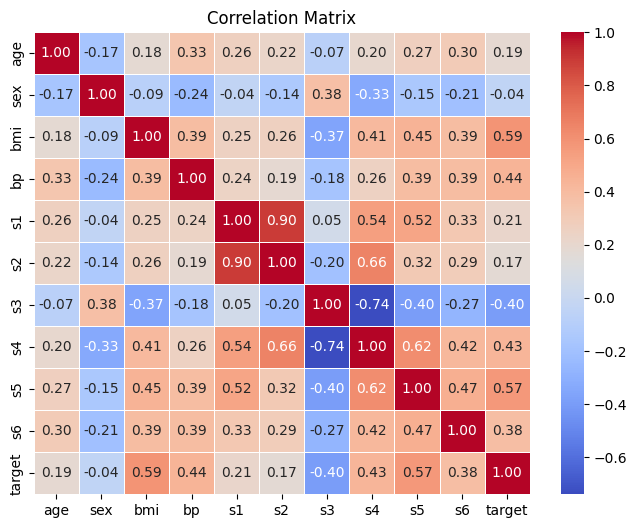

In [34]:
# Візуалізація теплової карти кореляції

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [35]:
# 7. Масштабувати ознаки.
X = df[['bmi', 's5', 'bp', 's4']]
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
# 8. Поділити дані на тренувальну і тестову вибірки.

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [37]:
# 9. Побудувати модель лінійной регресії і RandomForest регресії на
# основі більш корелюючих ознак (підібрати оптимальне число).

# Створення і навчання регресійної моделі
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred = model1.predict(X_test)

# Оцінка моделі
mse1 = mean_squared_error(y_test, y_pred)
r21 = r2_score(y_test, y_pred)

# Виведення результатів
print(f"Mean Squared Error: {mse1}")
print(f"R^2 Score: {r21}")

# Результати прогнозування
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Розташування результатів за спаданням прогнозів
results = results.sort_values(by='Predicted', ascending=False)

print("\nSorted Results:")
print(results)

Mean Squared Error: 3352.6731121347534
R^2 Score: 0.4517379143952711

Sorted Results:
     Actual   Predicted
114   258.0  286.027640
23    245.0  269.880753
256   346.0  251.844512
138   336.0  251.754943
250   303.0  243.159370
..      ...         ...
31     59.0   68.343836
57     37.0   67.700503
10    101.0   67.101066
34     65.0   66.788890
166    70.0   64.324186

[89 rows x 2 columns]


In [38]:
# 10. Вивести коефіцієнт детермінації і середньоквадратичну помилку.

# Виведення результатів
print(f"Коефіцієнт детермінації: {r21}")
print(f"Середньоквадратична помилка: {mse1}")

Коефіцієнт детермінації: 0.4517379143952711
Середньоквадратична помилка: 3352.6731121347534


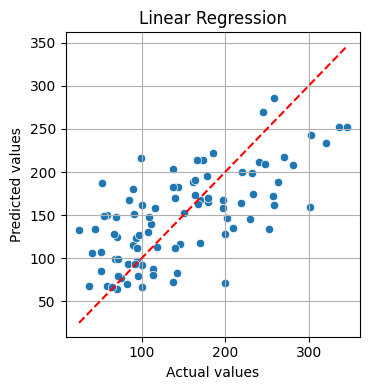

In [39]:
# 11. Побудувати графіки

# Візуалізація результатів
plt.figure(figsize=(10, 4))

# Scatter plot для Лінійної регресії
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=model1.predict(X_test))
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression')
plt.grid(True)

# Відображення графіків
plt.tight_layout()
plt.show()

In [40]:
# 12. Вивести справжні і прогнозовані значення.

print(results)

     Actual   Predicted
114   258.0  286.027640
23    245.0  269.880753
256   346.0  251.844512
138   336.0  251.754943
250   303.0  243.159370
..      ...         ...
31     59.0   68.343836
57     37.0   67.700503
10    101.0   67.101066
34     65.0   66.788890
166    70.0   64.324186

[89 rows x 2 columns]


In [41]:
# 13. Написати ВИСНОВКИ

Висновок:
У ході виконання лабораторної роботи було проведено детальний аналіз даних, пов'язаних з прогресом діабету на протязі року та 10 пов'язаних з цим фізіологічних змінних. Для дослідження було створенно модель лінійної регресії та її графік. Згідно з моделю, найбільшу кореляцію з прогресом діабету мають індекс маси тіла (bmi), рівень тригліцеридів у сироватці крові (s5), кров’яний тиск (bp) та загальний холестерин (s4).

In [42]:
# Завдання 2.
# Завантажити датасет California Housing Dataset, що містить інформацію
# про житло в Каліфорнії. Вивести перших 5 рядків.

from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X, y = data.data, data.target
df = pd.DataFrame(data=X, columns=data.feature_names)
df['target'] = y

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [43]:
# 1. Провести попередній аналіз даних за схемою (дивиться вище)

# Перевірити наявність пропусків. У разі виявлення замінити на
# середнє значення.

df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [44]:
# Перевірити наявність дублікатів, при виявленні – видалити.

df.duplicated()
df.drop_duplicates()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [45]:
# Замінити бінарні ознаки. У стовпчику «стать» спочатку перевірте
# унікальні значення.

print("Секції з бінарними ознаками відсутні")

# Перевірити тип даних. При необхідності замінити тип даних на числовий

print("Типи даних датасету: ")
df.dtypes

Секції з бінарними ознаками відсутні
Типи даних датасету: 


,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
target,float64


In [46]:
# 2. Масштабувати ознаки.

X = df.drop(columns=['target'])
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
# 3. Поділити дані на тренувальні і тестові

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [22]:
# 4. Побудувати 3 моделі: лін. Регресія, регресія випадковий ліс, Ridge.
# Підібрати оптимальні параметри за допомогою GridSeach.

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Налаштування моделей та підбір параметрів
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest Regressor': RandomForestRegressor()
}

# Параметри для GridSearchCV
param_grids = {
    'Ridge Regression': {
        'alpha': [0.1, 1, 10]
    },
    'Random Forest Regressor': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    }
}

best_models = {}

# Тренування та налаштування моделей
for name, model in models.items():
    print(f"\nНалаштування параметрів для {name}...")
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"Найкращі параметри для {name}: {grid_search.best_params_}")
    else:
        best_models[name] = model.fit(X_train, y_train)
        print(f"{name} не потребує налаштування параметрів.")

# Оцінка моделей
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\nОцінка {name}:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")


Налаштування параметрів для Linear Regression...
Linear Regression не потребує налаштування параметрів.

Налаштування параметрів для Ridge Regression...
Найкращі параметри для Ridge Regression: {'alpha': 0.1}

Налаштування параметрів для Random Forest Regressor...
Найкращі параметри для Random Forest Regressor: {'max_depth': None, 'n_estimators': 200}

Оцінка Linear Regression:
Mean Squared Error: 0.56
R^2 Score: 0.58

Оцінка Ridge Regression:
Mean Squared Error: 0.56
R^2 Score: 0.58

Оцінка Random Forest Regressor:
Mean Squared Error: 0.25
R^2 Score: 0.81


In [58]:
# Лінійна регресія

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Лінійна регресія: MSE =", mse_lin, ", R2 =", r2_lin)

results_lin = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_lin
})

results_lin = results_lin.sort_values(by='Predicted', ascending=False)

print("\nSorted Results:")
print(results_lin)

Лінійна регресія: MSE = 0.5558915986952442 , R2 = 0.575787706032451

Sorted Results:
        Actual  Predicted
1979   1.62500  11.500331
15693  5.00001   7.260293
17110  5.00001   7.087367
17108  5.00001   7.016410
9811   5.00001   6.988095
...        ...        ...
9660   0.57500  -0.261120
10072  1.16300  -0.543611
13925  0.48500  -0.591085
9665   0.52600  -0.688122
9664   0.56100  -1.013793

[4128 rows x 2 columns]


In [59]:
# Випадковий ліс

rf_reg = RandomForestRegressor(random_state=42, n_estimators=200)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest регресія: MSE =", mse_rf, ", R2 =", r2_rf)

results_rf = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_rf
})

results_rf = results_rf.sort_values(by='Predicted', ascending=False)

print("\nSorted Results:")
print(results_rf)

Random Forest регресія: MSE = 0.25401057726311893 , R2 = 0.8061593124887589

Sorted Results:
        Actual  Predicted
5277   5.00001    5.00001
8797   5.00001    5.00001
5259   5.00001    5.00001
16912  5.00001    5.00001
4044   5.00001    5.00001
...        ...        ...
20058  0.43700    0.50100
20045  0.43100    0.49767
2028   0.49800    0.49577
20046  0.47700    0.49443
19845  0.51700    0.49139

[4128 rows x 2 columns]


In [60]:
# Ridge
from sklearn.linear_model import Ridge

rid_reg = Ridge(random_state=42, alpha=0.1)
rid_reg.fit(X_train, y_train)
y_pred_rid = rid_reg.predict(X_test)

mse_rid = mean_squared_error(y_test, y_pred_rid)
r2_rid = r2_score(y_test, y_pred_rid)

print("Ridge: MSE =", mse_rid, ", R2 =", r2_rid)

results_rid = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_rid
})

results_rid = results_rid.sort_values(by='Predicted', ascending=False)

print("\nSorted Results:")
print(results_rid)

Ridge: MSE = 0.5558875470324997 , R2 = 0.5757907979394905

Sorted Results:
        Actual  Predicted
1979   1.62500  11.499499
15693  5.00001   7.260260
17110  5.00001   7.087332
17108  5.00001   7.016371
9811   5.00001   6.988030
...        ...        ...
9660   0.57500  -0.260986
10072  1.16300  -0.543522
13925  0.48500  -0.590911
9665   0.52600  -0.687930
9664   0.56100  -1.013591

[4128 rows x 2 columns]


In [51]:
# 5. Вивести R2 і MSE. Побудувати графіки.

print("Лінійна регресія: MSE =", mse_lin, ", R2 =", r2_lin)
print("Random Forest регресія: MSE =", mse_rf, ", R2 =", r2_rf)
print("Ridge: MSE =", mse_rid, ", R2 =", r2_rid)


Лінійна регресія: MSE = 0.5558915986952442 , R2 = 0.575787706032451
Random Forest регресія: MSE = 0.25401057726311893 , R2 = 0.8061593124887589
Ridge: MSE = 0.5558875470324997 , R2 = 0.5757907979394905


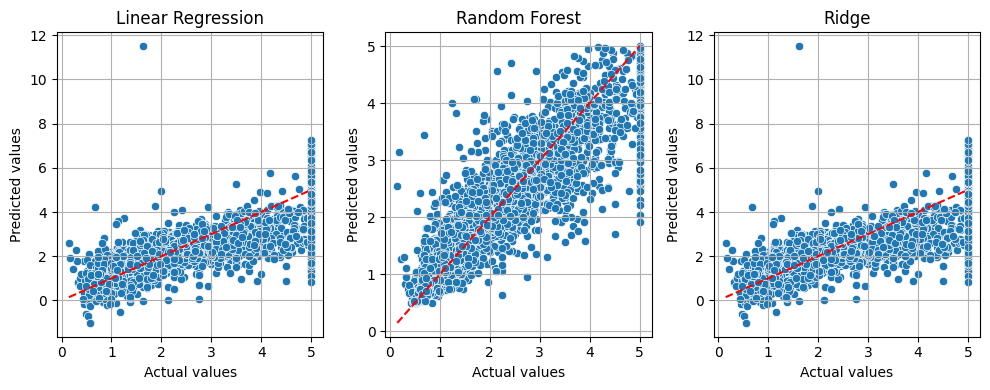

In [56]:
# Візуалізація результатів
plt.figure(figsize=(10, 4))

# Scatter plot для Лінійної регресії
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=lin_reg.predict(X_test))
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression')
plt.grid(True)

# Scatter plot для Random Forest
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=rf_reg.predict(X_test))
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Random Forest')
plt.grid(True)

# Scatter plot для Random Forest
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=rid_reg.predict(X_test))
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Ridge')
plt.grid(True)

# Відображення графіків
plt.tight_layout()
plt.show()

In [63]:
# 6. Вивести справжні і прогнозовані значення.

print("Лінійна регресія:")
print(results_lin)
print("")

print("Random Forest регресія:")
print(results_rf)
print("")

print("Ridge:")
print(results_rid)
print("")

Лінійна регресія:
        Actual  Predicted
1979   1.62500  11.500331
15693  5.00001   7.260293
17110  5.00001   7.087367
17108  5.00001   7.016410
9811   5.00001   6.988095
...        ...        ...
9660   0.57500  -0.261120
10072  1.16300  -0.543611
13925  0.48500  -0.591085
9665   0.52600  -0.688122
9664   0.56100  -1.013793

[4128 rows x 2 columns]

Random Forest регресія:
        Actual  Predicted
5277   5.00001    5.00001
8797   5.00001    5.00001
5259   5.00001    5.00001
16912  5.00001    5.00001
4044   5.00001    5.00001
...        ...        ...
20058  0.43700    0.50100
20045  0.43100    0.49767
2028   0.49800    0.49577
20046  0.47700    0.49443
19845  0.51700    0.49139

[4128 rows x 2 columns]

Ridge:
        Actual  Predicted
1979   1.62500  11.499499
15693  5.00001   7.260260
17110  5.00001   7.087332
17108  5.00001   7.016371
9811   5.00001   6.988030
...        ...        ...
9660   0.57500  -0.260986
10072  1.16300  -0.543522
13925  0.48500  -0.590911
9665   0.52600 

In [64]:
# 7. Написати висновки

Висновок:
У ході виконання лабораторної роботи було проведено детальний аналіз даних, пов'язаних з ринком житла у Каліфорнії . Для дослідження було використано модель лінійної регресії, модель випадкового лісу та модель Ridge. Моделі лінійної регресії та Ridge виявили найбільшу подібність, на відміну від моделі випадкового лісу. Результати роботи були завантажені на відповідний Github-репозиторій.